# Using ARC package for simple known H calculations

I will use the ARC functions to compare the results with well known theory results of H spectral lines and familiarise with these functions so I can apply them to more complex calculations in other notebooks.

In [1]:
# Import the arc package
from arc import *

In [2]:
# Create our Hydrogen atom
atom = Hydrogen(cpp_numerov=False)

## Lyman Series

Lyman series are hydrogen spectral series of transitions from:
$$ n \geq 2 $$ to the ground state $$ n = 1 $$ 
These transitions result in the emission of a photon in the ultraviolet spectrum. I am going to show using the ARC package the wavelenght of these emissions from n = 2 to n = 11

Next I plot the energy levels for n = 11 until n = 1, for l = 0 (subshell S - other subshell don't have transitions to the ground state)


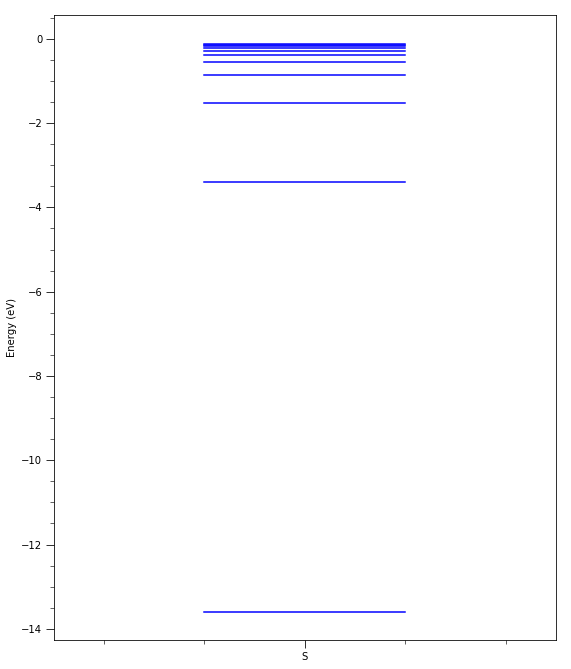

In [3]:
nmin=1  #Minimum n
nmax=11 #Maximum n
lmin=0  #Minimum l
lmax=0  #Maxmium l

#Plot Energy Levels of Hydrogen for Lyman series
levels = LevelPlot(atom)
levels.makeLevels(nmin,nmax,lmin,lmax)
levels.drawLevels()
levels.showPlot()


Calculate the wavelength for each transition

In [18]:
l=1
j=1.5
nf=1
lf=0
jf=0.5

for state in range(2,9):
    print("Transition %s to %s :" % (printStateString(state,l,j), printStateString(nf,lf,jf)))
    # print(atom.getTransitionWavelength(state,l,j,nf,lf,jf))  # returns value in units of m
    print("\tTransition wavelength:\t%.3f nm"
      % (atom.getTransitionWavelength(state,l,j,nf,lf,jf) * 1e9) )  # convert m into nm
    print("\tTransition frequency:\t%.3f GHz"
      % (atom.getTransitionFrequency(state, l, j, nf, lf, jf)*1e-9) ) # convert Hz into GHz
    print("\tTransition energy:\t%.2e eV"
      % (atom.getEnergy(nf,lf,jf) - atom.getEnergy(state,l,j)))
    #print("\tState's lifetime:\t%.2e s"         # kernel dies after transition 6 
      #% (atom.getStateLifetime(state,l,j)) )
    print("\tReduced Matrix Element:\t%.3f a_0 e" # kernel dies after transition 7
      % atom.getReducedMatrixElementJ(state,l,j,nf,lf,jf) )
    print("\tState Lifetime:\t\t%.2e ns"  
      % (atom.getStateLifetime(state, l, j)*1e9) )
    print("\tTransition Rate:\t%.3e s-1\n"
      % atom.getTransitionRate(state,l,j,nf,lf,jf, temperature=300.0) )

Transition 2 P 3/2 to 1 S 1/2 :
	Transition wavelength:	-121.567 nm
	Transition frequency:	-2466071.325 GHz
	Transition energy:	-1.02e+01 eV
	Reduced Matrix Element:	1.492 a_0 e
	State Lifetime:		1.59e+00 ns
	Transition Rate:	6.277e+08 s-1

Transition 3 P 3/2 to 1 S 1/2 :
	Transition wavelength:	-102.572 nm
	Transition frequency:	-2922746.213 GHz
	Transition energy:	-1.21e+01 eV
	Reduced Matrix Element:	-0.598 a_0 e
	State Lifetime:		5.26e+00 ns
	Transition Rate:	1.677e+08 s-1

Transition 4 P 3/2 to 1 S 1/2 :
	Transition wavelength:	-97.254 nm
	Transition frequency:	-3082582.802 GHz
	Transition energy:	-1.27e+01 eV
	Reduced Matrix Element:	0.352 a_0 e
	State Lifetime:		1.23e+01 ns
	Transition Rate:	6.840e+07 s-1

Transition 5 P 3/2 to 1 S 1/2 :
	Transition wavelength:	-94.974 nm
	Transition frequency:	-3156564.319 GHz
	Transition energy:	-1.31e+01 eV
	Reduced Matrix Element:	-0.242 a_0 e
	State Lifetime:		2.37e+01 ns
	Transition Rate:	3.449e+07 s-1

Transition 6 P 3/2 to 1 S 1/2 :
	Tra

For n > 6, the jupyter kernel is dying. The c library for the Numerov is crashing. I had to initiate the H atom without the Nummerov:
cpp_numerov=False

getStateLifetime is failing for n > 10, TypeError , strange because I don't get this error for n < 10

In [20]:
n1=110
l1=1
j1=1.5
n2=109
l2=0
j2=0.5

#print("\tState's lifetime:\t%.2e s\n"         # kernel dies after transition 6 
 # % (atom.getStateLifetime(n1,l1,j1)) )
#print("\tReduced Matrix Element:\t%.3f a_0 e" # kernel dies
  #% atom.getReducedMatrixElementJ(n1,l1,j1,n2,l2,j2) )
#print("\tState Lifetime:\t%.2e ns\n"  
#      % (atom.getStateLifetime(n1, l1, j1)*1e9) )
print("\tTransition Rate:\t%.3e s-1\n"
      % atom.getTransitionRate(n1,l1,j1,n2,l2,j2, temperature=300.0) )

	Transition Rate:	6.133e+01 s-1



# Energy levels

Draw energy level for high n states, n =109...

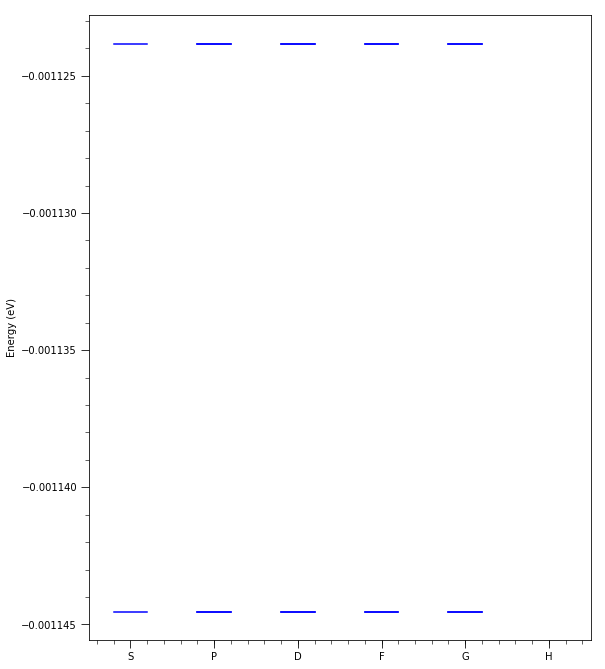

State 109 S 1/2 
	State Lifetime:	2.21e+06 ns

State 110 S 1/2 
	State Lifetime:	2.27e+06 ns



In [10]:
nmin=109  # Input data  
nmax=110 
lmin=0  
lmax=5  
j=0.5

#Plot Energy Levels of Hydrogen for states above
levels = LevelPlot(atom)
levels.makeLevels(nmin,nmax,lmin,lmax)
levels.drawLevels()
levels.showPlot()

# Information about this levels
for qnum in range(nmin,nmax+1) :
    #for ang in range(lmin,lmax+1) :
        print("State %s " % printStateString(qnum,0,j) )
        print("\tState Lifetime:\t%.2e ns\n" % (atom.getStateLifetime(qnum, 0, j)*1e9) )


Previous calculation saved as markdown to keep the information, since it took a while to complete
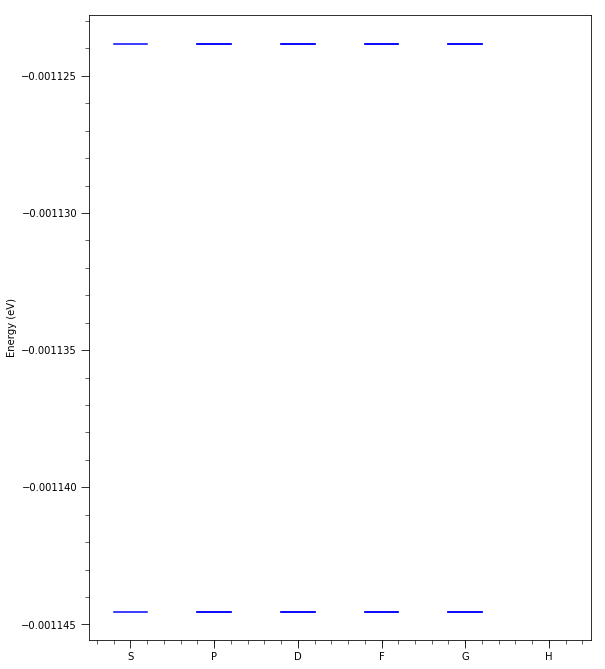
State 109 S 1/2 
	State Lifetime:	2.21e+06 ns

Calculation of this state lifetime took very long time on my machines, like 10 minutes?
State 110 S 1/2 
	State Lifetime:	2.27e+06 ns

